# Исследование объявлений о продаже квартир

#### Данные

Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет от сервиса Яндекс.Недвижимость

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

#### Шаги исследования

- Изучим общую информацию о датасете.
- Предобработаем его (обработаем пропуски и аномалии, устраним дубликаты, поменяем формат данных, где это требуется, добавим необходимые столбцы).
- Проанализируем следующие параметры объектов:
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
этаж квартиры;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;
день и месяц публикации объявления.
- Изучим, как быстро продавались квартиры.
- Установим, какие факторы больше всего влияют на общую (полную) стоимость объекта, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
- Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
- И, наконец, вычислим среднюю цену каждого километра в СПб и опишем, как стоимость объектов зависит от расстояния до центра города.

#### Цели исследования

Установить, какие из параметров датасета влияют на рыночную стоимость объектов недвижимости и каким образом. Вычислить среднюю стоимость жилья для разных районов Петербурга и других городов Ленобласти.

### Общая информация 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) #чтобы отображались все столбцы

import warnings #по совету ревьюера из прошлого проекта
warnings.filterwarnings('ignore')

df = pd.read_csv(r"C:\Users\bonny\Desktop\мои_проекты_практикум\проект_3_недвижимость\real_estate_data.csv", sep='\t', decimal='.')
df.info() #получаем общую информацию о датасете
df.head(10) #выводим первые 10 строк таблицы для ознакомления

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Мы видим, что в таблице 23699 строк и 22 столбца, в 14 из которых есть пропуски. Количество пропусков по столбцам неравномерно: в некоторых их совсем мало, например, в столбце locality_name их всего 49, floors_total - 86, и наоборот, в некоторых столбцах практически отсутствуют данные, например, в is_apartment 20924 пропуска. Также из общей таблицы сразу видно, что формат данных некоторых столбцов неподходящий, например, формат first_day_exposition - object, хотя в нем хранится дата и время публикации; is_apartment тоже object, хотя, по аналогии со studio и open_plan, там должно быть булево значение. 

array([[<AxesSubplot: title={'center': 'total_images'}>,
        <AxesSubplot: title={'center': 'last_price'}>,
        <AxesSubplot: title={'center': 'total_area'}>,
        <AxesSubplot: title={'center': 'rooms'}>],
       [<AxesSubplot: title={'center': 'ceiling_height'}>,
        <AxesSubplot: title={'center': 'floors_total'}>,
        <AxesSubplot: title={'center': 'living_area'}>,
        <AxesSubplot: title={'center': 'floor'}>],
       [<AxesSubplot: title={'center': 'kitchen_area'}>,
        <AxesSubplot: title={'center': 'balcony'}>,
        <AxesSubplot: title={'center': 'airports_nearest'}>,
        <AxesSubplot: title={'center': 'cityCenters_nearest'}>],
       [<AxesSubplot: title={'center': 'parks_around3000'}>,
        <AxesSubplot: title={'center': 'parks_nearest'}>,
        <AxesSubplot: title={'center': 'ponds_around3000'}>,
        <AxesSubplot: title={'center': 'ponds_nearest'}>],
       [<AxesSubplot: title={'center': 'days_exposition'}>,
        <AxesSubplot: >, 

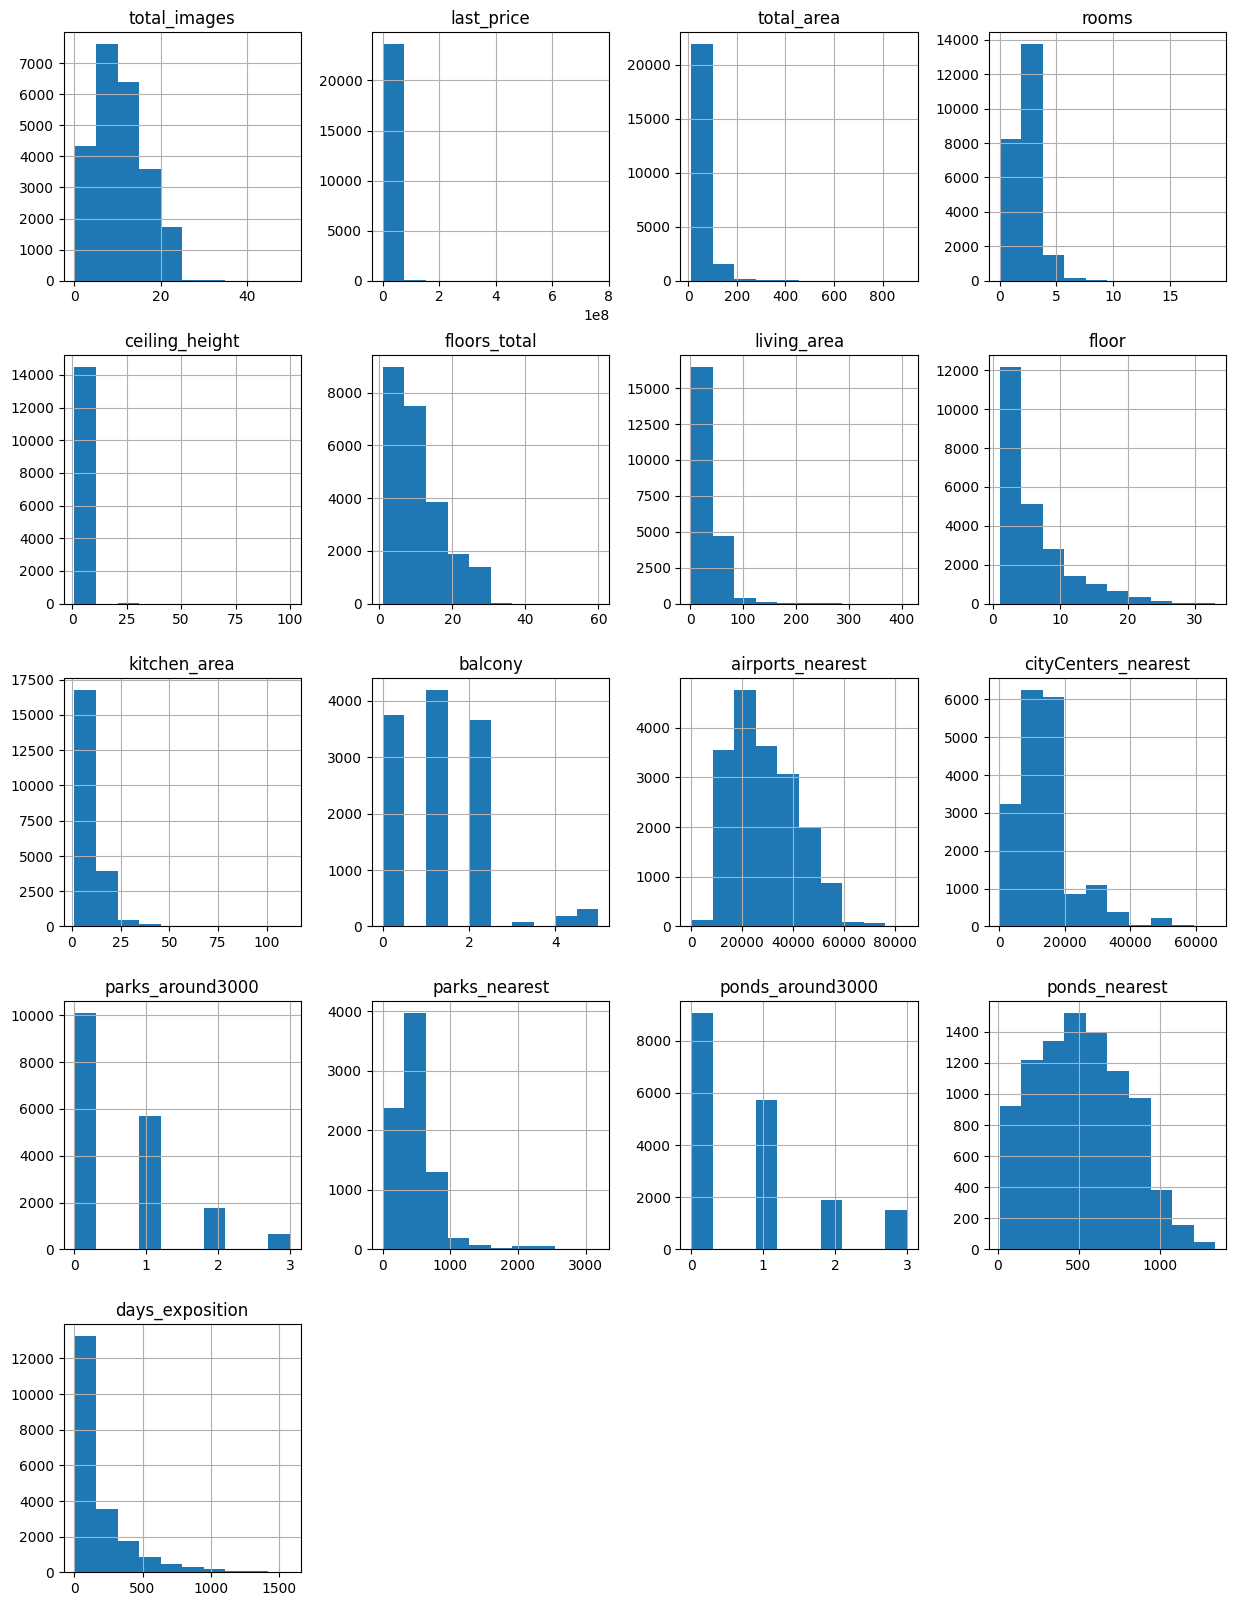

In [2]:
df.hist(figsize=(15, 20)) #строим гистограммы для всех столбцов датасета с числовой информацией

Распределение нормальное или стремится к нормальному в столбцах total_images, rooms, airports_nearest, cityCenters_nearest, ponds_nearest, parks_nearest - четыре последних столбца содержат картографические данные, не добавленные пользователями. Предположительно, с этими данными все хорошо, но нужно проверить отдельно. В столбцах balcony, parks_around3000 и ponds_around3000 на графике отдельные столбцы, снижающиеся вправо - это закономерно относительно информации в них. На большинстве остальных гистограмм мы видим пик в начале с резким снижением вправо. По крайней мере для некоторых столбцов это можно объяснить масштабом графика (например, для kitchen_area - площадь кухни часто небольшая и значения просто слились). Нужно будет строить гистограммы для отдельных столбцов с более подходящим масштабом на следующем этапе, чтобы понять, есть ли в данных проблемы. Пока самой «подозрительной» гистограммой выглядит last_price - даже первые 10 строк таблицы показывают очень большой разброс цен, а на графике один столбец у нуля. Нужно разбираться. 

### Предобработка данных

#### Обработка пропусков

In [3]:
df.isna().mean() #посчитаем долю пропусков по столбцам

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [4]:
df = df.dropna(subset=['floors_total', 'locality_name'])
#Эти данные никак не восстановить, а пропусков в них всего 0,4% и 0,2% по каждому столбцу 
#соответственно, их удаление не должно исказить картину. Удалим эти сроки.

Заполним пропуски в столбце airports_nearest медианным значением расстояния до аэропорта среди квартир из одного населенного пункта. Для квартир из поселков и деревень это должно сработать довольно точно, с СПб - хуже, но медиана, по крайней мере, не должна ничего перекосить.

Заполним пропуски в столбце cityCenters_nearest медианным значением расстояния до центра города среди квартир с одинаковым расстоянием до аэропорта.

Не идеально, но способа точнее мы не придумали.

In [5]:
for n in df['locality_name'].unique():
    df.loc[(df['locality_name'] == n) & (df['airports_nearest'].isna()), 'airports_nearest'] = \
    df.loc[(df['locality_name'] == n), 'airports_nearest'].median()

In [6]:
for a in df['airports_nearest'].unique():
    df.loc[(df['airports_nearest'] == a) & (df['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    df.loc[(df['airports_nearest'] == a), 'cityCenters_nearest'].median()

In [7]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.385487
floors_total            0.000000
living_area             0.079143
floor                   0.000000
is_apartment            0.882877
studio                  0.000000
open_plan               0.000000
kitchen_area            0.094292
balcony                 0.486951
locality_name           0.000000
airports_nearest        0.230511
cityCenters_nearest     0.230808
parks_around3000        0.233397
parks_nearest           0.659240
ponds_around3000        0.233397
ponds_nearest           0.616550
days_exposition         0.134564
dtype: float64

Таким образом нам удалось заполнить совсем немного значений. Значит, между пропусками в этих столбцах есть взаимосвязь, когда нет одного значения, нет и второго. Оставим эти пропуски как есть.

In [8]:
# Предположим, что если продавец не указал наличие балкона, то его в квартире нет
# Заполним пропуски в этом столбце нулем

df['balcony'] = df['balcony'].fillna(0)  

В части строк parks_nearest, где значения отсутствуют, в столбце parks_around3000 значение 0.0
То есть, хоть мы и не знаем расстояние до ближайшего парка, мы точно знаем, что он дальше 3 км.
Также по аналогии с балконами можно предположить, что информации о парках в радиусе 3 км нет тогда, когда нет и парка. Заменим такие пропуски на 0. Пропуски в parks_nearest заменим на медианное значение расстояния до ближайшего парка, выходящего за пределы 3-км радиуса.

In [9]:
far_parks = df[df['parks_nearest']>3000] #находим медиану для расстояния до парка
print(far_parks['parks_nearest'].median())

3127.0


In [10]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df.loc[(df['parks_around3000']==0.0)&(df['parks_nearest'].isna()),'parks_nearest'] = 3127     

In [11]:
#Решение по аналогии с парками
far_ponds = df[df['ponds_nearest']>3000] 
print(far_ponds['ponds_nearest'].median())
print(far_ponds)

nan
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []


In [12]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df.loc[(df['ponds_around3000']==0.0)&(df['ponds_nearest'].isna()),'ponds_nearest'] = 10000

В столбце is_apartment 20924 пропуска - данные практически отсутствуют. Предположим, что те, кто продавал апартаменты, указывал это в столбце, и если данные отсутствуют, то объект - не апартаменты. Заполним пропуски в столбце значением False.

In [13]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [14]:
# Проверим, есть ли взаимосвязь с пропусками в столбце days_exposition с датой публикации объявления

missing_days = df.loc[df['days_exposition'].isna()]
missing_days['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2019-04-18T00:00:00',
       '2018-11-18T00:00:00', '2018-12-02T00:00:00',
       '2019-01-31T00:00:00', '2018-11-22T00:00:00',
       '2017-09-22T00:00:00', '2019-03-27T00:00:00',
       '2018-12-27T00:00:00', '2019-03-13T00:00:00',
       '2019-04-23T00:00:00', '2019-04-09T00:00:00',
       '2019-03-23T00:00:00', '2017-10-30T00:00:00',
       '2019-02-07T00:00:00', '2019-04-06T00:00:00',
       '2019-03-10T00:00:00', '2019-04-29T00:00:00',
       '2018-08-20T00:00:00', '2019-02-27T00:00:00',
       '2019-03-20T00:00:00', '2018-07-11T00:00:00',
       '2019-02-28T00:00:00', '2019-04-08T00:00:00',
       '2017-04-11T00:00:00', '2019-03-08T00:00:00',
       '2019-03-14T00:00:00', '2019-03-30T00:00:00',
       '2019-04-11T00:00:00', '2017-08-23T00:00:00',
       '2019-04-16T00:00:00', '2018-09-08T00:00:00',
       '2019-04-17T00:00:00', '2018-09-07T00:00:00',
       '2019-04-01T00:00:00', '2017-12-12T00:00:00',
       '2019-04-24T00:00:00', '2017-12-15T00:0

Как нам кажется, взаимосвязи нет - в списке уникальных значений столбца first_day_exposition самые разные значения, встречаются все годы, разные месяцы и даты, какой-либо корреляции мы не заметили.
Возникла гипотеза, что на момент выгрузки данных эти квартиры еще не были проданы, и поэтому данные отсутствуют, но проверить это мы не можем. Оставим эти пропуски как есть.

Чтобы заполнить пропуски в столбцах living_area и kitchen_area, найдем медианное соотношение жилой площади и площади кухни с общей, а затем умножим общую площадь на эти коэффициенты и заполним пропуски, так как общая площадь известна для всех объектов.

In [15]:
living_share = df['living_area']/df['total_area']
  
print(living_share.median())

kitchen_share = df['kitchen_area']/df['total_area']
    
print(kitchen_share.median())

0.568210015790661
0.1723625557206538


In [16]:
for a in df['total_area'].unique():
    df.loc[(df['total_area'] == a) & (df['living_area'].isna()), 'living_area'] = df['total_area']* 0.57
    
    
for a in df['total_area'].unique():
    df.loc[(df['total_area'] == a) & (df['kitchen_area'].isna()), 'kitchen_area'] = df['total_area']* 0.17    

In [17]:
#проверим, не превышает ли сумма площадей кухни и жилой площади общую площадь

df.query('total_area < (kitchen_area + living_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,False,False,False,6.2000,0.0,Санкт-Петербург,13952.0,15031.0,0.0,3127.0,1.0,824.0,12.0
424,14,11500000.0,98.00,2016-05-10T00:00:00,3,2.65,3.0,88.00,3,False,False,False,16.6600,1.0,Санкт-Петербург,39363.0,13270.0,0.0,3127.0,0.0,10000.0,90.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,False,True,False,4.6087,2.0,Санкт-Петербург,38171.0,15015.0,0.0,3127.0,2.0,982.0,64.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,NaN,18.0,20.00,9,False,False,False,5.0000,0.0,Санкт-Петербург,9731.0,11849.0,0.0,3127.0,0.0,10000.0,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,False,False,False,9.2800,2.0,посёлок Мурино,NaN,NaN,0.0,3127.0,0.0,10000.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22246,6,3100000.0,27.30,2018-05-29T00:00:00,0,2.70,16.0,23.30,15,False,True,False,4.6410,1.0,Санкт-Петербург,41935.0,9551.0,0.0,3127.0,0.0,10000.0,59.0
22907,9,65000000.0,228.00,2016-06-02T00:00:00,4,NaN,5.0,200.00,2,False,False,False,38.7600,0.0,Санкт-Петербург,22783.0,1295.0,3.0,619.0,3.0,269.0,NaN
23102,0,5800000.0,66.00,2017-06-09T00:00:00,5,NaN,5.0,55.50,1,False,False,False,11.2200,0.0,Санкт-Петербург,12007.0,11933.0,0.0,3127.0,0.0,10000.0,21.0
23191,3,1900000.0,18.90,2016-04-04T00:00:00,1,NaN,16.0,16.00,12,False,False,False,3.2130,0.0,Тосно,NaN,NaN,0.0,3127.0,0.0,10000.0,115.0


In [18]:
#в 116 строках наше заполнение привело к тому, что сумма площадей кухни и жилой площади 
#превышает общую площадь. Удалим их, т.к. более точного метода заполнения этих пропусков мы не видим.

df = df.query('total_area >= (kitchen_area + living_area)').reset_index(drop=False)

In [19]:
df.query('total_area < (kitchen_area + living_area)').count() #проверили, что строки-«нарушители» удалены

index                   0
total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

Далее обработаем пропуски в ceiling_height. Если бы в таблице была информация о годе постройки здания, мы могли бы заполнить пропуски медианой для каждого года, предположив, что в одно время строили примерно одинаковые дома. Например, в дореволюционных квартирах потолки выше 3 метров, в «хрущевках» - 2,5 метра и т.д. Но данных о годе строительства у нас нет, зато есть этажность. Предположим, что здания - типовые, и высота потолков в них одинаковая или почти одинаковая (5-ти этажные хрущевки, 9-ти этажные «панельки» 1990-х, 6-7-этажные доходные дома конца 19–начала 20го веков и т.д.), и заполним пропуски медианнным значением для домов одинаковой этажности.

In [20]:
for f in df['floors_total'].unique():
    df.loc[(df['floors_total'] == f) & (df['ceiling_height'].isna()), 'ceiling_height'] = \
    df.loc[(df['floors_total'] == f), 'ceiling_height'].median()   

In [21]:
df.isna().sum() # Проверим, что пропусков больше нет

index                      0
total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             1
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5398
cityCenters_nearest     5405
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3159
dtype: int64

In [22]:
df = df.dropna(subset=['ceiling_height']) #в одной строке не заполнилась высота потолка, удалим ее

In [23]:
df = df.reset_index(drop=True) #переиндексируем

Пропуски устранены. 
Данные были пропущены и в столбцах с информацией, которую вносит пользователь, и в картографических.
В первом случае, вероятно, люди сами не внесли данные. Например, они могли знать общую площадь квартиры,
но не знать площадь комнат или кухни. Или, если в квартире нет балкона, не написать ничего, 
вместо того, чтобы вписать 0.
Во втором случае данные могли не записаться при составлении таблицы из-за технической ошибки или плохой 
выгрузки.
Мы постарались удалить как можно меньше строк, восстанов значения оптимальным, на наш взгляд, способом.

#### Изменение типов данных

In [24]:
df.info() #еще раз изучим инфо о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23448 entries, 0 to 23447
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 23448 non-null  int64  
 1   total_images          23448 non-null  int64  
 2   last_price            23448 non-null  float64
 3   total_area            23448 non-null  float64
 4   first_day_exposition  23448 non-null  object 
 5   rooms                 23448 non-null  int64  
 6   ceiling_height        23448 non-null  float64
 7   floors_total          23448 non-null  float64
 8   living_area           23448 non-null  float64
 9   floor                 23448 non-null  int64  
 10  is_apartment          23448 non-null  bool   
 11  studio                23448 non-null  bool   
 12  open_plan             23448 non-null  bool   
 13  kitchen_area          23448 non-null  float64
 14  balcony               23448 non-null  float64
 15  locality_name      

Заменим тип данных на целочисленный в столбцах floors_total, balcony, parks_around3000 и ponds_around3000, т.к. половинки парка или трети балкона быть не может.

In [25]:
df['floors_total'] = df['floors_total'].astype('int32')
df['balcony'] = df['balcony'].astype('int32')
df['parks_around3000'] = df['parks_around3000'].astype('int32')
df['ponds_around3000'] = df['ponds_around3000'].astype('int32')

df.info() #проверяем

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23448 entries, 0 to 23447
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 23448 non-null  int64  
 1   total_images          23448 non-null  int64  
 2   last_price            23448 non-null  float64
 3   total_area            23448 non-null  float64
 4   first_day_exposition  23448 non-null  object 
 5   rooms                 23448 non-null  int64  
 6   ceiling_height        23448 non-null  float64
 7   floors_total          23448 non-null  int32  
 8   living_area           23448 non-null  float64
 9   floor                 23448 non-null  int64  
 10  is_apartment          23448 non-null  bool   
 11  studio                23448 non-null  bool   
 12  open_plan             23448 non-null  bool   
 13  kitchen_area          23448 non-null  float64
 14  balcony               23448 non-null  int32  
 15  locality_name      

#### Устранение дубликатов

In [26]:
df.duplicated().sum()
#Убедились, что явных дубликатов в таблице нет


0

In [27]:
df['locality_name'].value_counts()

Санкт-Петербург                    15574
посёлок Мурино                       511
посёлок Шушары                       438
Всеволожск                           393
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

In [28]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [29]:
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('посёлок ', '', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('поселок ', '', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('коттеджный ', '', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('городской ', '', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('городского типа ', '', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('деревня ', '', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('садовое товарищество ', '', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('садоводческое некоммерческое товарищество ', '', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('село ', '', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('имени ', '', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('станции ', '', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('при железнодорожной ', '', regex=True)

In [30]:
df['locality_name'].value_counts()

Санкт-Петербург            15574
Мурино                       576
Кудрово                      468
Шушары                       438
Всеволожск                   393
                           ...  
Пельгора                       1
Каложицы                       1
Платформа 69-й километр        1
Почап                          1
Дзержинского                   1
Name: locality_name, Length: 305, dtype: int64

Нашли и устранили 59 неявных дубликата.

#### Устранение аномалий

In [31]:
display(df[df['floors_total']>37])

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2232,2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60,27.4,4,False,False,False,7.4,0,Кронштадт,67763.0,49488.0,2,342.0,3,614.0,166.0
16553,16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52,10.5,18,False,False,False,14.0,0,Санкт-Петербург,20728.0,12978.0,1,793.0,0,10000.0,45.0


По информации портала https://spbhomes.ru/ от 28.01.21, самый высокий жилой дом в СПб имеет 37 этажей. В таблице два дома выше, один из них в Петербурге, другой - в Кронштадте, где также нет таких высоких домов. Предположительно, дом в Кронштадте - 6-ти этажный, заменим значение. 52-х этажный дом в СПб удалим.

In [32]:
df.loc[df['floors_total']==60,'floors_total'] = 6
df = df.loc[df['floors_total'] != 52]

In [33]:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

In [34]:
display(df[df['rooms']>10])

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
639,648,3,17500000.0,183.7,2018-07-01T00:00:00,11,3.40,7,138.8,7,False,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0,3127.0,0,10000.0,NaN
855,866,5,25000000.0,363.0,2017-12-23T00:00:00,14,3.16,5,222.0,4,False,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0,3127.0,2,435.0,418.0
5305,5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,10000.0,14.0
9595,9688,8,33000000.0,194.1,2017-02-07T00:00:00,11,3.43,5,129.0,2,False,False,False,11.9,0,Санкт-Петербург,21469.0,1015.0,1,686.0,2,66.0,813.0
14337,14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,2.55,5,264.5,2,False,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0,3127.0,2,548.0,114.0
18654,18848,6,28500000.0,270.0,2015-03-02T00:00:00,16,3.00,4,180.0,4,False,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1,516.0,0,10000.0,1365.0
19336,19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,3127.0,2,318.0,106.0
20612,20829,6,28659000.0,245.4,2016-03-31T00:00:00,14,3.00,4,168.3,2,False,False,False,25.9,0,Санкт-Петербург,21104.0,2054.0,3,541.0,2,118.0,95.0


В датасете есть несколько квартир с большим количеством комнат. Мы вывели их на экран и убедились, что все такие квартиры - большие по площади, поэтому нет оснований удалять эти строки, данные могут быть верны.

In [35]:
display(df[(df['rooms']==0)&(~df['studio']==True)&(~df['open_plan']==True)])

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [36]:
display(df[(df['rooms']==1)&((df['studio']==True)|(df['open_plan']==True))])

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1364,1379,3,6000000.0,44.20,2015-11-10T00:00:00,1,2.75,25,17.40,23,False,False,True,7.5140,1,Санкт-Петербург,10663.0,12738.0,0,3127.0,0,10000.0,231.0
2368,2389,5,2250000.0,25.41,2016-06-07T00:00:00,1,2.65,12,17.08,8,False,True,False,4.3197,2,Санкт-Петербург,14125.0,12921.0,2,328.0,2,485.0,26.0
3155,3187,13,3800000.0,27.00,2016-05-17T00:00:00,1,2.60,14,18.00,8,False,True,False,4.5900,2,Санкт-Петербург,50348.0,16053.0,0,3127.0,0,10000.0,45.0
4139,4180,4,4500000.0,34.00,2016-04-25T00:00:00,1,2.80,10,21.00,10,False,True,False,5.7800,2,Санкт-Петербург,23609.0,5299.0,0,3127.0,1,433.0,62.0
5614,5668,9,3550000.0,36.70,2016-04-25T00:00:00,1,2.75,16,17.80,2,False,False,True,6.2390,2,Кудрово,NaN,NaN,0,3127.0,0,10000.0,61.0
8974,9063,6,3800000.0,39.00,2016-05-19T00:00:00,1,2.70,17,30.00,1,False,False,True,6.6300,0,Санкт-Петербург,36721.0,13635.0,0,3127.0,0,10000.0,45.0
10906,11026,1,2800000.0,28.00,2016-05-04T00:00:00,1,2.66,26,19.00,6,False,True,False,4.7600,2,Парголово,53511.0,19687.0,0,3127.0,0,10000.0,45.0
12788,12935,10,2200000.0,31.00,2016-05-15T00:00:00,1,2.50,8,22.30,5,False,True,False,5.2700,1,Никольское,NaN,NaN,0,3127.0,0,10000.0,44.0
18539,18732,4,2400000.0,22.00,2016-05-06T00:00:00,1,2.60,10,15.00,6,False,True,False,3.7400,0,Кудрово,NaN,NaN,0,3127.0,0,10000.0,45.0
19877,20086,0,1550000.0,22.00,2016-05-11T00:00:00,1,2.70,15,10.94,14,False,True,False,3.7400,2,Никольское,NaN,NaN,0,3127.0,0,10000.0,45.0


В датасете есть квартиры с 0 комнат. Фильтр показал, что все они либо студии, либо квартиры со свободной планировкой. Однако, как мы видим выше, некоторые студии или квартиры со свободной планировкой указаны как однокомнатные. Заменим для таких квартир 1 на 0, чтобы не смешивать студии и «однушки». Запомним, что 0 в столбце rooms означает, что это студия или квартира со свободной планировкой.

In [37]:
df.loc[(df['rooms']==1)&((df['studio']==True)|(df['open_plan']==True)),'rooms'] = 0

Посмотрим на значения в столбце с высотой потолков.

In [38]:
display(df[df['ceiling_height']>5.7])

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
352,355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.00,5,32.0,2,False,False,False,9.384,2,Гатчина,NaN,NaN,0,3127.0,0,10000.0,259.0
394,397,15,5990000.0,54.0,2018-03-22T00:00:00,2,14.85,36,21.4,28,False,False,False,18.700,1,Санкт-Петербург,18732.0,20444.0,0,3127.0,3,80.0,11.0
3116,3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.00,3,53.0,2,False,False,False,8.000,0,Волхов,NaN,NaN,0,3127.0,0,10000.0,NaN
3440,3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.00,5,15.3,2,False,False,False,7.300,0,Нурма,NaN,NaN,0,3127.0,0,10000.0,125.0
4598,4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.00,9,30.0,2,False,False,False,7.000,1,Санкт-Петербург,12016.0,13256.0,1,658.0,1,331.0,181.0
4829,4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.00,25,17.0,17,False,False,True,4.250,2,Мурино,NaN,NaN,0,3127.0,0,10000.0,28.0
5028,5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.00,5,19.5,1,True,False,False,5.500,0,Санкт-Петербург,29686.0,8389.0,3,397.0,1,578.0,7.0
5195,5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.00,5,30.0,3,False,False,False,9.000,2,Мины,NaN,NaN,0,3127.0,0,10000.0,540.0
5615,5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.00,9,21.3,3,False,False,False,7.000,2,Санкт-Петербург,28981.0,10912.0,1,305.0,0,10000.0,267.0
5751,5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.00,36,41.0,13,False,False,False,12.000,5,Санкт-Петербург,18732.0,20444.0,0,3127.0,3,80.0,38.0


Поиск в гугле выдал объявление о продаже лофтов в СПБ с потолками до 5,7 м., это самые высокие потолки в жилом помещении, которые нам удалось найти. Мы взяли эту высоту как максимально возможную и посмотрели, какие значения ее превышают. В значениях типа 25.0 и 32.0 может быть ошибка, могло иметься в виду 2.5 и 3.2 метра. Заменим такие значения подобным образом. Остальные удалим.

In [39]:
df.loc[(df['ceiling_height']>= 25.0), 'ceiling_height'] = df['ceiling_height']/10


In [40]:
display(df[df['ceiling_height']<2.5])

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
191,193,6,7920000.0,83.8,2017-08-17T00:00:00,4,2.47,9,55.90,9,False,False,False,9.80,1,Санкт-Петербург,30352.0,7724.0,0,3127.0,1,289.0,155.0
225,227,13,2200000.0,47.0,2018-01-12T00:00:00,3,2.34,5,26.79,1,False,False,False,7.99,0,Новый Свет,NaN,NaN,0,3127.0,0,10000.0,45.0
544,552,11,2999000.0,33.5,2017-03-30T00:00:00,1,2.00,15,17.50,6,False,False,False,6.50,0,Санкт-Петербург,33972.0,11746.0,1,520.0,1,949.0,270.0
623,632,20,3350000.0,35.0,2017-11-14T00:00:00,2,2.45,9,21.00,9,False,False,False,6.00,2,Кузьмоловский,NaN,NaN,0,3127.0,0,10000.0,NaN
976,987,12,7100000.0,65.5,2016-03-30T00:00:00,4,2.46,5,51.00,4,False,False,False,9.40,0,Санкт-Петербург,24542.0,5110.0,1,572.0,0,10000.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22350,22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12,32.40,7,False,False,False,10.00,0,Санкт-Петербург,33053.0,14217.0,2,293.0,2,289.0,13.0
22715,22960,17,2300000.0,53.6,2018-10-18T00:00:00,2,2.00,2,19.00,1,False,False,False,10.00,0,Всеволожск,NaN,NaN,0,3127.0,0,10000.0,NaN
22875,23121,20,4290000.0,35.2,2018-09-12T00:00:00,1,2.47,14,20.00,7,False,False,False,7.80,1,Санкт-Петербург,7900.0,13142.0,1,506.0,0,10000.0,41.0
23247,23496,7,3300000.0,55.3,2018-06-19T00:00:00,2,2.45,14,31.00,2,False,False,False,8.40,3,Сертолово,NaN,NaN,0,3127.0,0,10000.0,62.0


В датасете есть квартиры с потолками ниже 250 см, удалим их.

In [41]:
df = df.query('2.5 <= ceiling_height <= 5.7')

### Добавление в таблицу новых столбцов

По условиям задания нам нужно добавить в таблицу новые столбцы со следующими параметрами:
-	цена одного квадратного метра;
-	день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
-	месяц публикации объявления;
-	год публикации объявления;
-	тип этажа квартиры (значения — «первый», «последний», «другой»);
-	расстояние до центра города в километрах (перевести из м в км и округлить до целых значений).

Сделаем это.

In [42]:
df['sqm_price'] = df['last_price']/df['total_area']
df['day_listed'] = pd.DatetimeIndex(df['first_day_exposition']).dayofweek
df['month_listed'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_listed'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].round()

In [43]:
def floor_type(df):
    if df.loc['floor'] == df.loc['floors_total']:
        return "последний"
    elif df.loc['floor'] == 1:
        return "первый"
    else:
        return "другой" 
    
df['floor_type'] = df.apply(floor_type, axis=1)  

df.head(10) #проверяем, что столбцы добавились верно

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,day_listed,month_listed,year_listed,cityCenters_nearest_km,floor_type
0,0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.000,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,16.0,другой
1,1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.75,11,18.600,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0,3127.0,0,10000.0,81.0,82920.792079,1,12,2018,19.0,первый
2,2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.55,5,34.300,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,14.0,другой
3,3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.60,14,90.630,9,False,False,False,27.03,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7,2015,7.0,другой
4,4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.000,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,8.0,другой
5,5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12,14.400,5,False,False,False,9.10,0,Янино-1,NaN,NaN,0,3127.0,0,10000.0,55.0,95065.789474,0,9,2018,NaN,другой
6,6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.66,26,10.600,6,False,False,False,14.40,1,Парголово,52996.0,19143.0,0,3127.0,0,10000.0,155.0,99195.710456,3,11,2017,19.0,другой
7,7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.75,24,40.812,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,3127.0,0,10000.0,NaN,110544.692737,3,4,2019,12.0,другой
8,8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27,15.430,26,False,False,False,8.81,0,Мурино,NaN,NaN,0,3127.0,0,10000.0,189.0,87454.764777,2,5,2018,NaN,другой
9,9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.600,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,3127.0,0,10000.0,289.0,88524.590164,6,2,2017,15.0,другой


Нужные столбцы добавлены, теперь можно приступать к анализу.

### Исследовательский анализ данных

#### Изучение отдельных параметров

Для начала изучим общую площадь квартир.

In [44]:
df['total_area'].describe()

count    23362.000000
mean        60.411145
std         35.703014
min         13.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

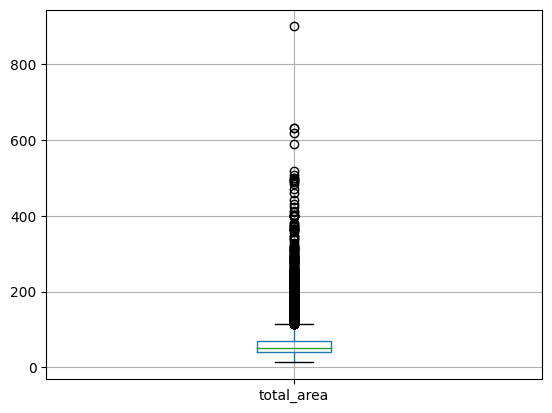

Text(0, 0.5, 'к-во квартир')

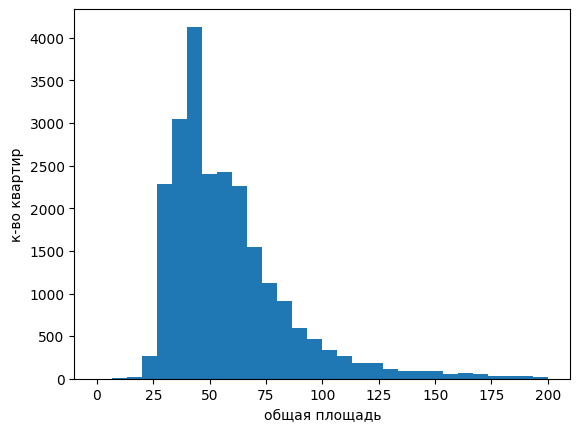

In [45]:
total_area = pd.DataFrame(df['total_area'])
plt.show(total_area.boxplot())
plt.hist(df['total_area'], bins=30, range=(0, 200))
plt.xlabel('общая площадь')
plt.ylabel('к-во квартир')

Самая большая квартира в датасете - 900 кв.м., самая маленькая - 12. Мы видим, что средняя площадь квартиры (63 кв.м.) значительно отличается от медианы (54 кв.м.), что говорит о большом разбросе значений, их неоднородности (на это также указывает большое стандартное отклонение). 
Диаграмма размаха не очень информативна, значения сливаются. Однако на ней можно увидеть, что квартира 900 кв.м. такая одна, затем с большим оставанием есть несколько квартир с площадью около 600 кв.м. Межквартильный размах расположился в самом низу графика, поэтому при построении гистограммы мы отсекли квартиры площадью больше 200 кв.м., чтобы подробнее рассмотреть распределение квартир с наиболее часто встречающейся площадью.
Мы видим, что распределение на гистограмме стремится к нормальному, больше всего квартир в списке - площадью около 50 кв.м.


Далее рассмотрим жилую площадь.

In [46]:
df['living_area'].describe()

count    23362.000000
mean        34.566276
std         22.342500
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

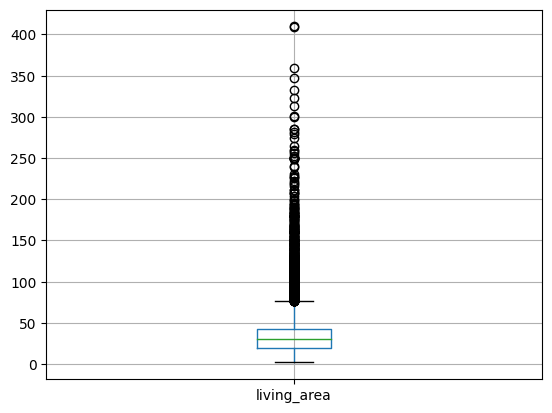

Text(0, 0.5, 'к-во квартир')

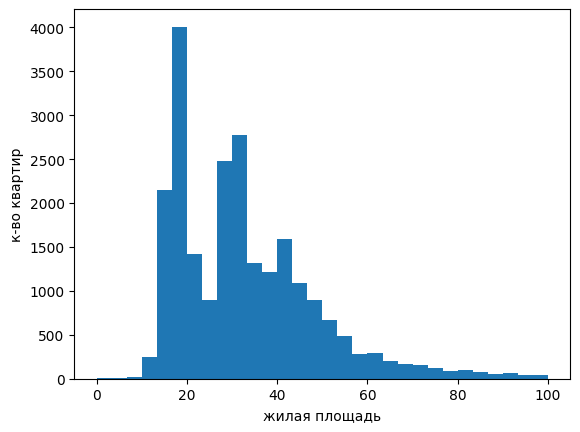

In [47]:
living_area = pd.DataFrame(df['living_area'])
plt.show(living_area.boxplot())
plt.hist(df['living_area'], bins=30, range=(0, 100))
plt.xlabel('жилая площадь')
plt.ylabel('к-во квартир')

In [48]:
display(df[df['living_area'] == 2])

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,day_listed,month_listed,year_listed,cityCenters_nearest_km,floor_type
13760,13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.00,6,2.0,2,False,False,False,9.00,0,Санкт-Петербург,32453.0,6521.0,0,3127.0,1,1012.0,91.0,122115.384615,1,2,2018,7.0,другой
21528,21758,0,2330000.0,23.0,2018-01-01T00:00:00,0,2.75,24,2.0,22,False,True,False,3.91,0,Мурино,NaN,NaN,0,3127.0,0,10000.0,66.0,101304.347826,0,1,2018,NaN,другой


In [49]:
df = df.loc[df['living_area'] != 2]

Самая большая жилая площадь - 400 кв.м., самая маленькая - 2. В таблице две таких квартиры, студия 23 м. и двухкомнатная квартира площадью 54 кв.м., их жилая площадь точно не может быть 2 кв.м. Мы их удалили. Среднее и медианное значение также отличаются, указывая на неоднородность данных.
Диаграмма размаха также не очень информативна, значения сливаются. Мы построили гистограмму для квартир с жилой площадью до 100 кв.м., чтобы подробнее рассмотреть данные о квартирах из межквартильного размаха.
На графике два пика - в районе 20 кв.м. и меньший в районе 30 кв.м. После применро 45 кв.м. начинается постепенное снижение. Верноятно, пики можно объяснить типовой застройкой с несколькими наиболее популярными типами квартир.

Рассмотрим площадь кухни.

In [50]:
df['kitchen_area'].describe()

count    23360.000000
mean        10.466068
std          5.990772
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [51]:
display(df.loc[df['kitchen_area']==1.3])
display(df.loc[df['kitchen_area']==112])

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,day_listed,month_listed,year_listed,cityCenters_nearest_km,floor_type
20007,20217,7,4250000.0,28.5,2019-05-01T00:00:00,1,2.8,14,19.5,10,False,False,False,1.3,0,Санкт-Петербург,37199.0,12721.0,0,3127.0,0,10000.0,NaN,149122.807018,2,5,2019,13.0,другой


,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,day_listed,month_listed,year_listed,cityCenters_nearest_km,floor_type
19336,19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,3127.0,2,318.0,106.0,466666.666667,2,12,2017,8.0,последний


In [52]:
df = df.loc[df['kitchen_area'] != 1.3]

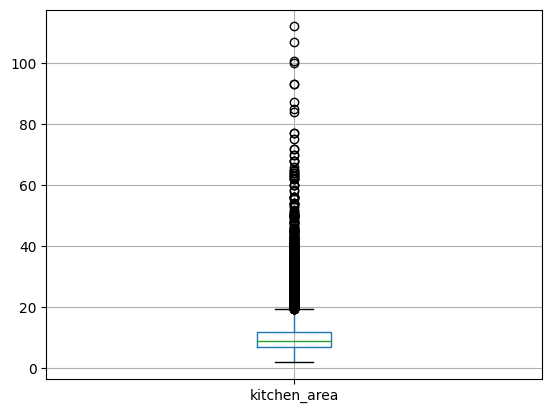

Text(0, 0.5, 'к-во квартир')

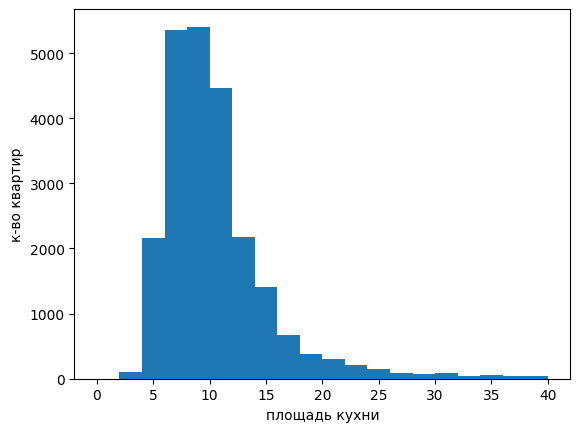

In [53]:
kitchen_area = pd.DataFrame(df['kitchen_area'])
plt.show(kitchen_area.boxplot())
plt.hist(df['kitchen_area'], bins=20, range=(0, 40))
plt.xlabel('площадь кухни')
plt.ylabel('к-во квартир')


Медиана и среднее значение площади кухни почти не различаются, значит, выбросов в данных нет или почти нет. Распределение на гистограмме - нормальное.
Наиболее часто встречающаяся площадь кухни - около 7 кв.м.

Вывели на экран квартиры с минимальной и максимальной площадью кухни. В первом случае, скорее всего, ошибка - площадь квартиры 28,5 кв.м. и это не студия и не квартира со свободной планировкой, что могло бы объяснить такую площадь кухни. Удалили ее. Во втором случае площадь квартиры 900 кв.м., поэтому кухня в 112 кв.м. вполне реальна.


Исследуем цену объекта.

In [54]:
df['last_price'].describe()

count    2.335900e+04
mean     6.541846e+06
std      1.087924e+07
min      1.219000e+04
25%      3.440000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Числа слишком большие, поэтому отображаются в таком формате.
Нашла вот такое решение для этой проблемы:
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
но т.к. сама пока не понимаю, как это работает, то и использовать не буду. 

Вместо этого создадим новую колонку в таблице с ценой в млн руб и будем работать с ней. 
Зато теперь мы знаем, почему гистограмма при первоначальном знакомстве с данными выглядела так странно.

In [55]:
df['price_mln'] = df['last_price']/1000000
df['price_mln'].describe()

count    23359.000000
mean         6.541846
std         10.879236
min          0.012190
25%          3.440000
50%          4.650000
75%          6.800000
max        763.000000
Name: price_mln, dtype: float64

In [56]:
display(df.sort_values(by='price_mln').head())
display(df.sort_values(by='price_mln').tail())

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,day_listed,month_listed,year_listed,cityCenters_nearest_km,floor_type,price_mln
8706,8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25,32.00,25,False,False,False,40.50,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,10000.0,8.0,111.834862,2,3,2019,9.0,последний,0.01219
14748,14911,5,430000.0,54.0,2018-06-26T00:00:00,2,2.80,3,30.78,3,False,False,False,9.18,0,Свирь,NaN,NaN,0,3127.0,0,10000.0,44.0,7962.962963,1,6,2018,NaN,последний,0.43000
17274,17456,7,430000.0,30.4,2019-04-22T00:00:00,1,2.70,2,16.00,1,False,False,False,6.00,0,Сланцы,NaN,NaN,0,3127.0,0,10000.0,NaN,14144.736842,0,4,2019,NaN,первый,0.43000
16106,16274,18,440000.0,40.0,2018-07-10T00:00:00,1,2.55,5,22.80,1,False,False,False,6.80,0,Старополье,NaN,NaN,0,3127.0,0,10000.0,45.0,11000.000000,1,7,2018,NaN,первый,0.44000
17490,17676,0,450000.0,36.5,2018-02-01T00:00:00,1,2.55,5,17.30,4,False,False,False,8.50,1,Ям-Тесово,NaN,NaN,0,3127.0,0,10000.0,120.0,12328.767123,3,2,2018,NaN,другой,0.45000


,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,day_listed,month_listed,year_listed,cityCenters_nearest_km,floor_type,price_mln
15486,15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7,258.0,5,False,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0,3127.0,2,198.0,111.0,4.854369e+05,0,12,2017,5.0,другой,300.0
1420,1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7,95.0,5,False,False,False,40.0,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233.0,1.736842e+06,2,4,2018,1.0,другой,330.0
14544,14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,2.55,9,204.0,9,False,False,False,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393.0,1.000748e+06,5,2,2016,2.0,последний,401.3
19336,19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,3127.0,2,318.0,106.0,4.666667e+05,2,12,2017,8.0,последний,420.0
12823,12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,2.60,10,250.0,10,False,False,False,68.0,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33.0,1.907500e+06,5,9,2017,4.0,последний,763.0


Минимальная цена в 12190 рублей - явная ошибка. Но восстановить, какая цена была на самом деле, мы не можем (квартира 109 кв.м. может стоить и 12, и 121 млн руб.). Удалим эту строку, потому что для дальнейшего анализа нам постоянно нужен столбец с ценой, а такой выброс будет все искажать. 
Максимальные значения трогать не будем - мало ли сколько люди за свою квартиру просят, может, и 763 млн рублей.

In [57]:
df = df.loc[df['last_price'] != 12190.0]
df = df.reset_index(drop=True)

In [58]:
df['price_mln'].describe()

count    23358.000000
mean         6.542125
std         10.879385
min          0.430000
25%          3.440000
50%          4.650000
75%          6.800000
max        763.000000
Name: price_mln, dtype: float64

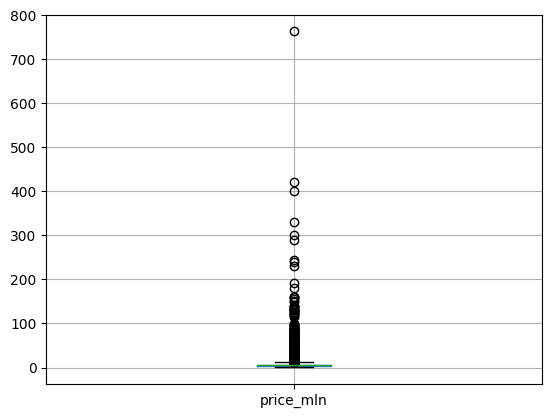

Text(0, 0.5, 'к-во квартир')

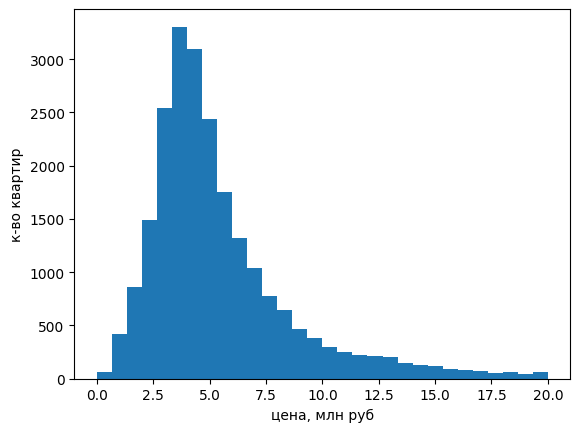

In [59]:
price_mln = pd.DataFrame(df['price_mln'])
plt.show(price_mln.boxplot())
plt.hist(df['price_mln'], bins=30, range=(0,20))
plt.xlabel('цена, млн руб')
plt.ylabel('к-во квартир')

Распределение на гистограмме нормальное. Среднее и медианное значение значительно различаются, что указывает на большой разброс данных.

Вообще, рассматривать цену в отрыве от других парамертов квартиры - не показательно. Разброс цен большой, потому что и квартиры очень разные. Если и рассматривать цену отдельно, то тогда цену за кв.м. Но все это мы будем делать ниже.

Рассмотрим количество комнат.

In [60]:
df['rooms'].describe()

count    23358.000000
mean         2.072909
std          1.078557
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Text(0, 0.5, 'к-во квартир')

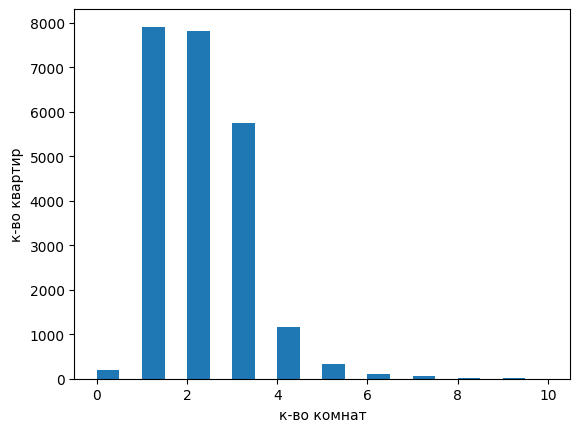

In [61]:
rooms = pd.DataFrame(df['rooms'])
plt.hist(df['rooms'], bins=20, range=(0,10))
plt.xlabel('к-во комнат')
plt.ylabel('к-во квартир')


Данные однородны, больше всего квартир в продаже - одно- и двухкомнатные.

Изучим высоту потолков.

In [62]:
df['ceiling_height'].describe()

count    23358.000000
mean         2.708148
std          0.232399
min          2.500000
25%          2.550000
50%          2.650000
75%          2.750000
max          5.600000
Name: ceiling_height, dtype: float64

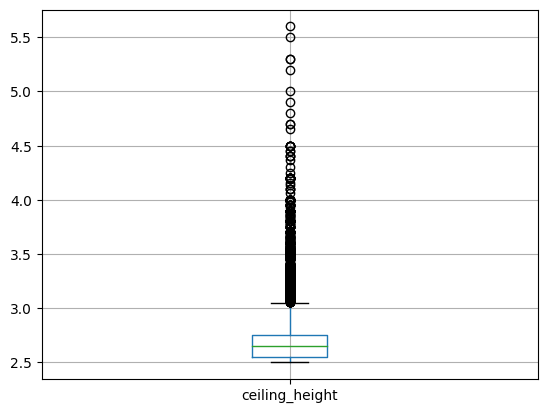

Text(0, 0.5, 'к-во квартир')

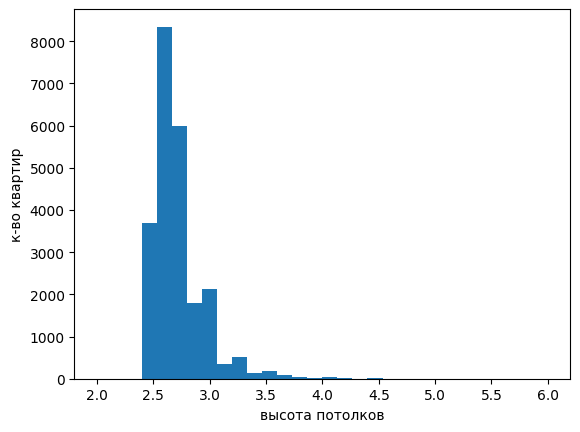

In [63]:
ceiling_height = pd.DataFrame(df['ceiling_height'])
plt.show(ceiling_height.boxplot())
plt.hist(df['ceiling_height'], bins=30, range=(2,6))
plt.xlabel('высота потолков')
plt.ylabel('к-во квартир')


Среднее и медианное значение порактически совпадают, данные однородны. Самая распространенная высота потолка - 2,65 м. Распределение нормальное.

Исследуем этаж квартиры.

In [64]:
df['floor'].value_counts()

2     3322
3     3042
1     2880
4     2776
5     2587
6     1282
7     1202
8     1066
9     1038
10     679
11     514
12     512
13     368
15     336
14     329
16     312
17     224
18     172
19     142
21     118
22     109
20     108
23      98
24      60
25      44
26      24
27      10
30       1
29       1
33       1
31       1
Name: floor, dtype: int64

Text(0, 0.5, 'к-во квартир')

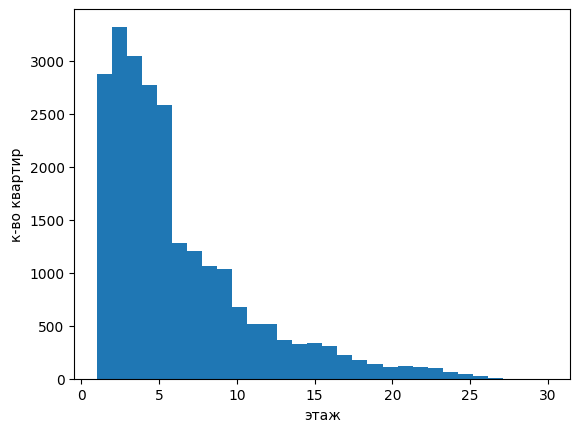

In [65]:
plt.hist(df['floor'], bins=30, range=(1,30))
plt.xlabel('этаж')
plt.ylabel('к-во квартир')


Распределение на гистограмме нормальное. Чаще всего встречаются квартиры на этажах с 1 по 5 (почти поровну в каждой группе). Возможная причина - во многих районах Петербурга ограничена высотность зданий, большинство домов - 5-7 этажей.

Посмотрим на распределение квартир по типу этажа.

In [66]:
df['floor_type'].value_counts()

другой       17189
последний     3312
первый        2857
Name: floor_type, dtype: int64

<AxesSubplot: >

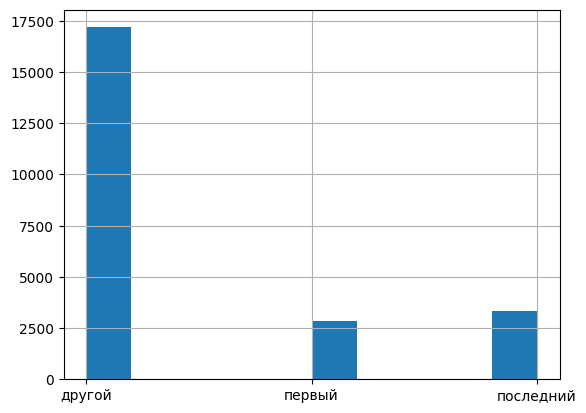

In [67]:
df['floor_type'].hist()

Большинство квартир расположено не на первом и не на последнем этаже.

Посмотрим на общее количество этажей в домах.

In [68]:
df['floors_total'].value_counts()

5     5720
9     3741
16    1358
12    1348
4     1186
10    1170
25    1063
6      900
17     826
3      660
7      584
14     546
18     497
24     456
8      385
2      375
15     364
23     348
19     336
22     282
20     271
13     227
11     200
27     163
21     157
26     124
35      23
1       23
28      21
36       2
34       1
29       1
Name: floors_total, dtype: int64

Text(0, 0.5, 'к-во квартир')

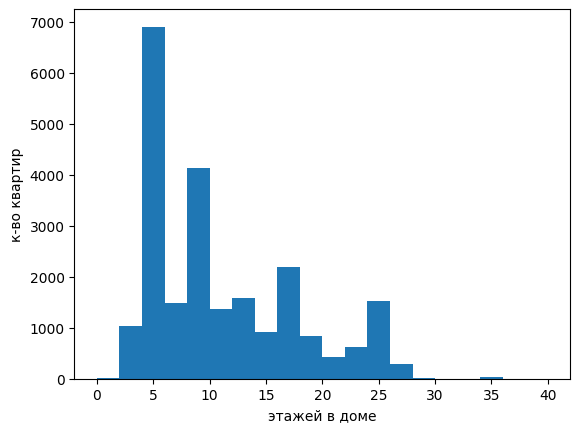

In [69]:
plt.hist(df['floors_total'], bins=20, range=(0,40))
plt.xlabel('этажей в доме')
plt.ylabel('к-во квартир')

На гистограмме мы видим 5 нисходящих пиков: 5, 9, 12, 16 и 25 этажей. Вероятнее всего, это можно объяснить типовой застройкой. В середине ХХ века строилось много 5-тиэтажных домов («хрущевки») (более старые дома, как правило, тоже невысокие), в 90-е годы панельные 9-тиэтажки, сейчас окраины застраиваются высокими домами в 16, 25 этажей.

Изучим, как квартиры распределяются по расстоянию до центра города.

In [70]:
df['cityCenters_nearest'].describe()

count    17986.000000
mean     14189.873068
std       8609.852515
min        181.000000
25%       9261.250000
50%      13073.000000
75%      16278.750000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Text(0, 0.5, 'к-во квартир')

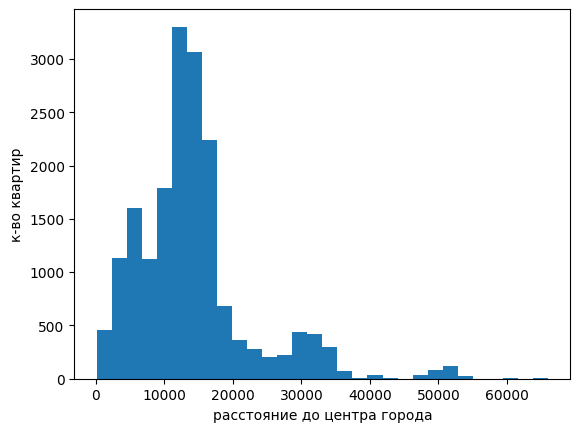

In [71]:
plt.hist(df['cityCenters_nearest'], bins=30)
plt.xlabel('расстояние до центра города')
plt.ylabel('к-во квартир')

Мы видим, что распределение нормальное, самая распространенная удаленность от центра города - около 13-15 км. Применительно к СПб, примерно на таком расстоянии от центра расположены районы, где изначально массово строились жилые дома, к тому же более высокие, чем в центре. Следовательно, там в принципе больше квартир, и продается тоже больше.
Небольшой пик в районе 5 км от центра может указывать на дореволюционные жилые районы типа Васильевского острова и Петроградской стороны, где дома тоже в основном жилые, просто меньшего размера.
В самом центре квартир продается значительно меньше, так как и жилых домов там значительно меньше.

На графике также видны скопления квартир на расстоянии 45-55 км от центра и даже 65 км от центра. Предположительно, столбец  cityCenters_nearest хранит расстояние до центра СПб (по условиям это не ясно), а эти квартиры расположены в других населенных пунктах Ленобласти.

Посмотрим на распределение квартир по расстоянию до аэропорта.

In [72]:
df['airports_nearest'].describe()

count    17993.000000
mean     28802.544351
std      12607.425922
min          0.000000
25%      18606.000000
50%      26763.000000
75%      37228.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [73]:
df = df.loc[df['airports_nearest'] !=0]

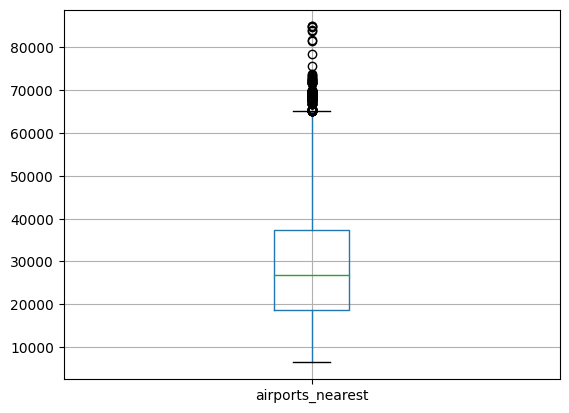

Text(0, 0.5, 'к-во квартир')

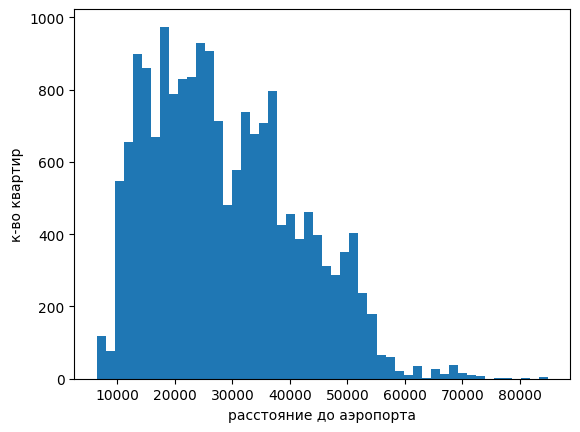

In [74]:
airports_nearest = pd.DataFrame(df['airports_nearest'])
plt.show(airports_nearest.boxplot())
plt.hist(df['airports_nearest'], bins=50)
plt.xlabel('расстояние до аэропорта')
plt.ylabel('к-во квартир')

В СПб и Ленобласти один аэропорт - «Пулково», расположенный на Юго-Западе на расстоянии 21 км от центра СПб. 
Крайне большие расстояния до аэропорта (60-80 км, за пределами межквартильного размаха), вероятнее всего, принадлежат квартирам из других населенных пунктов на севере ЛО.
На гистограмме мы видим несколько пиков, но в целом распределение стремится к нормальному. Среднее и медианное значения близки (26757 км и 28800 км соответственно). В целом, по всей видимости, квартиры распределены по городу достаточно равномерно.

Смущает одна квартира прямо в аэропорту - такого быть не может. Но восстановить настоящее расстояние не представляется возможным, удалили ее.

Посмотрим на распределение квартир по расстоянию до ближайшего парка.

In [75]:
df['parks_nearest'].describe()

count    23357.000000
mean      2228.400223
std       1265.384872
min          1.000000
25%        601.000000
50%       3127.000000
75%       3127.000000
max       3190.000000
Name: parks_nearest, dtype: float64

Text(0, 0.5, 'к-во квартир')

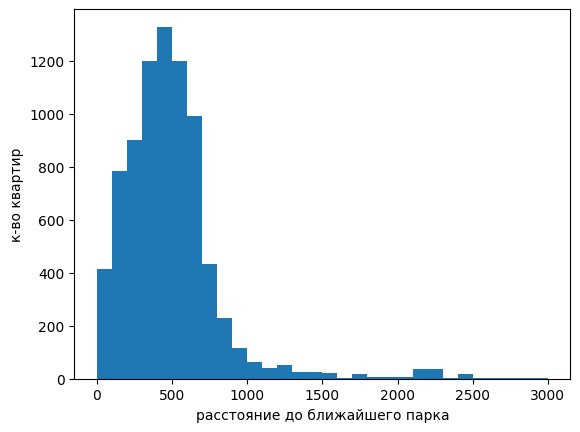

In [76]:
plt.hist(df['parks_nearest'], bins=30, range=(0, 3000))
plt.xlabel('расстояние до ближайшего парка')
plt.ylabel('к-во квартир')

Как мы помним, мы заполнили пропущенные значения в этом столбце расстоянием 3127 м - медианой расстояния до ближайшего парка за пределами 3 км радиуса. То есть для этих квартир мы лишь можем утверждать, что рядом нет парка ближе 3 км, и таких квартир - большинство. Мы ограничили график 3000 м, чтобы этот столбец не искажал картину.
Гистограмма по изначально имеющимся значениям имеет нормальное распределение, чаще всего ближайший парк находится на расстоянии около 500 метров. У большинства квартир, по которым были данные, есть парк в радиусе 1 км.

Наконец, изучим день и месяц публикации объявлений.

In [77]:
df['day_listed'].value_counts()

3    4242
1    4125
4    3951
2    3913
0    3556
5    1908
6    1662
Name: day_listed, dtype: int64

In [78]:
df['month_listed'].value_counts()

2     2614
3     2551
11    2339
4     2337
10    2088
9     1955
6     1733
8     1725
7     1670
12    1625
1     1478
5     1242
Name: month_listed, dtype: int64

<AxesSubplot: ylabel='Frequency'>

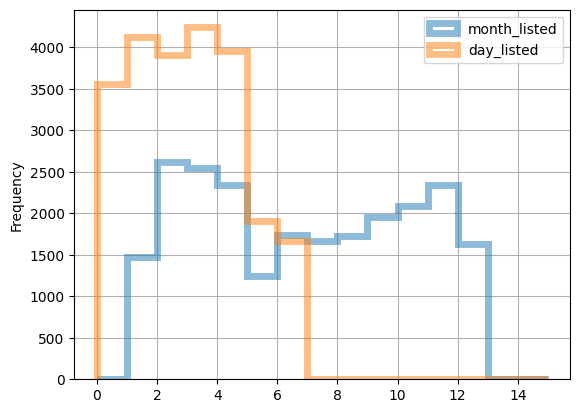

In [79]:
ax = df['month_listed'].plot(kind='hist', y='month_listed', histtype='step', range=(0, 15), bins=15,
linewidth=5, alpha=0.5, legend=True)
df['day_listed'].plot(kind='hist', y='day_listed', histtype='step', range=(0, 15), bins=15,
linewidth=5, alpha=0.5, ax=ax, grid=True, legend=True)


Как мы видим, в будние дни публикуется примерно в 2 раза больше объявлений, чем в выходные.
Меньше всего объявлений публикуется в январе, мае и декабре, больше всего - в феврале и ноябре. В летние месяцы объявлений меньше, чем весной и осенью.

#### Изучение скорости продаж квартир

In [80]:
df['days_exposition'].describe()

count    20210.000000
mean       181.090747
std        220.155596
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

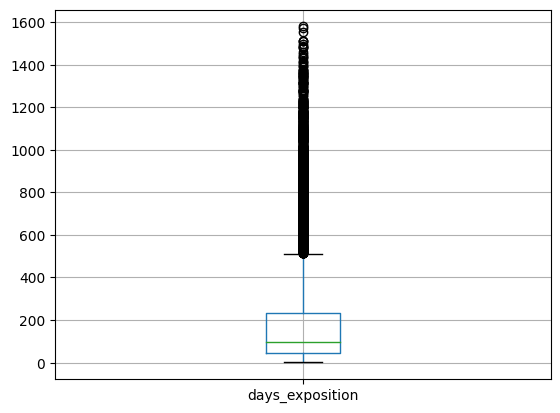

Text(0, 0.5, 'к-во квартир')

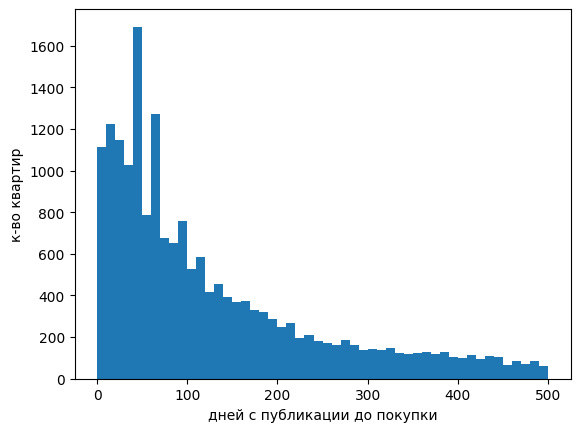

In [81]:
days_exposition = pd.DataFrame(df['days_exposition'])
plt.show(days_exposition.boxplot())
plt.hist(df['days_exposition'], bins=50, range=(0, 500))
plt.xlabel('дней с публикации до покупки')
plt.ylabel('к-во квартир')

<AxesSubplot: >

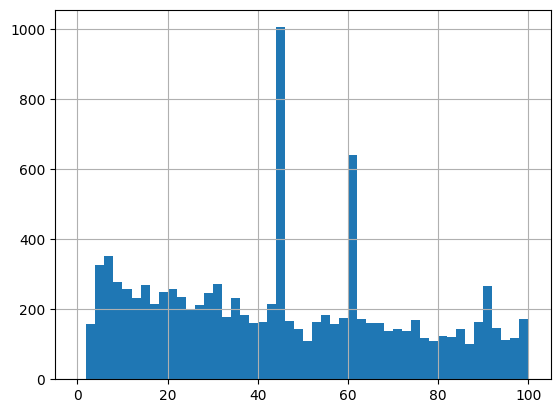

In [82]:
df['days_exposition'].hist(bins=50, range=(0, 100))

<AxesSubplot: >

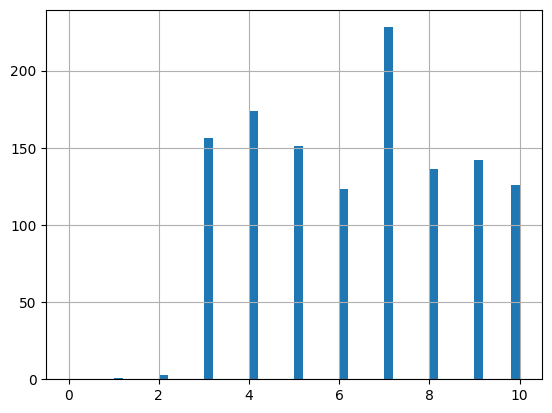

In [83]:
df['days_exposition'].hist(bins=50, range=(0, 10))

Изучение столбца 'days_exposition' показало, что в среднем квартира продается за 171 день. При этом медианное значение - 96 дней, разрыв очень большой, значит, есть большой разброс данных. И действительно, самая быстрая продажа состоялась через день после публикации объявления, самая долгая - через 1572 дня. 
Мы видим, что график постепенно снижается, то есть в целом квартиры реже продаются долго. На графике размаха видно, что межквартильный размах заканчивается примерно на 450 днях, все, что дальше этой отметки, можно считать необычно долгими продажами.
Пики можно объяснить тем, что мы заполнили пропуски медианным значением для каждого года. Гистограмма похожа на распределение Пуассона - продаж в более короткие сроки больше.
На укрупненной гистограмме видно, что есть продажи за 1 и 2 дня после публикации объявлений, эти продажи можно считать необычайно быстрыми. Но и в целом, если квартира продалась за первые 50 дней, то это хороший показатель.

#### Изучение факторов, влияющих на стоимость квартиры

Изучим, зависит ли цена от:
-	общей площади;
-	жилой площади;
-	площади кухни;
-	количества комнат;
-	этажа, на котором расположена квартира (первый, последний, другой);
-	даты размещения (день недели, месяц, год).


In [84]:
df[['price_mln', 'total_area', 'kitchen_area', 'living_area', 'rooms', 'cityCenters_nearest']].corr()

,price_mln,total_area,kitchen_area,living_area,rooms,cityCenters_nearest
price_mln,1.000000,0.653569,0.515161,0.583399,0.361883,-0.205792
total_area,0.653569,1.000000,0.661639,0.947428,0.758673,-0.230552
kitchen_area,0.515161,0.661639,1.000000,0.501200,0.325706,-0.192049
living_area,0.583399,0.947428,0.501200,1.000000,0.829280,-0.228466
rooms,0.361883,0.758673,0.325706,0.829280,1.000000,-0.184122
cityCenters_nearest,-0.205792,-0.230552,-0.192049,-0.228466,-0.184122,1.000000


Построили матрицу корреляции, чтобы сразу изучить взаимосвязь цены и общей площади, жилой площади, площади кухни, количества комнат и расстояния до центра.
Зависимость между ценой квартиры от ее площади есть, она положительная - чем больше квартира, тем она дороже - и самая сильная. Коэффициент корреляции Пирсона составил 0,65. То есть корреляция сильная, но все же на цену влияют и другие параметры, взаимосвязь сложнее.
Взаимосвязь между общей площадью и ценой и площадью кухни и ценой также есть (коэффициенты 0,58 и 0,51 соответственно). При этом на матрице видно, что корреляция между общей и жилой площадью близка к единице, а между общей и площадью кухни - 0,66, тоже довольно сильная. То есть эти параметры близко связаны, а значит, при расчете цены квартиры можно взять просто общую площадь, этого будет достаточно.
Прямое влияние количества комнат на цену есть, коэффициент составил 0,36. При этом коэффициент между к-вом комнат и общей площадью - 0,76. То есть, опять же, можно учитывать одну общую площадь (ее коэффициент корреляции с ценой самый высокий из этих параметров, которые, в свою очередь, прямо и сильно зависят от общей площади).
Зависимость цены от расстояния до центра обратная, коэффициент Пирсона равен -0,2. То есть зависимость не очень сильная, но есть - чем дальше от центра, тем дешевле (однако другие параметры влияют сильнее). Стоимость жилья в зависимости от удаленности от центра мы рассмотрим отдельно ниже.

Посторим попарные диаграммы рассеяния, чтобы наглядно отобразить описанные зависимости. Т.к. мы решили, что жилая площадь, площадь кухни и к-во комнат зависят от общей площади и влияют на цену слабее, мы не стали включать их в диаграмму.

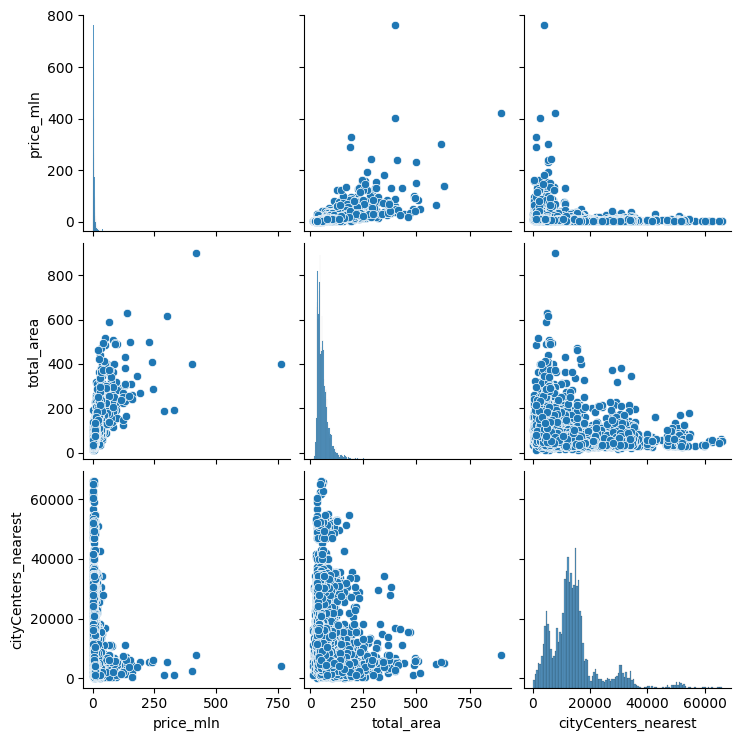

In [85]:
sns.pairplot(df, vars=['price_mln', 'total_area', 'cityCenters_nearest'])

Изучим корреляцию между ценой квартиры и этажом, на котором она находится.

In [86]:
price_to_floors = pd.pivot_table(df, index='floor_type', values='price_mln', aggfunc=['median','mean'])
display(price_to_floors)

,median,mean
,price_mln,price_mln
floor_type,,
другой,4.85,6.684936
первый,3.90,4.824572
последний,4.30,7.282448


<AxesSubplot: xlabel='floor_type', ylabel='price_mln'>

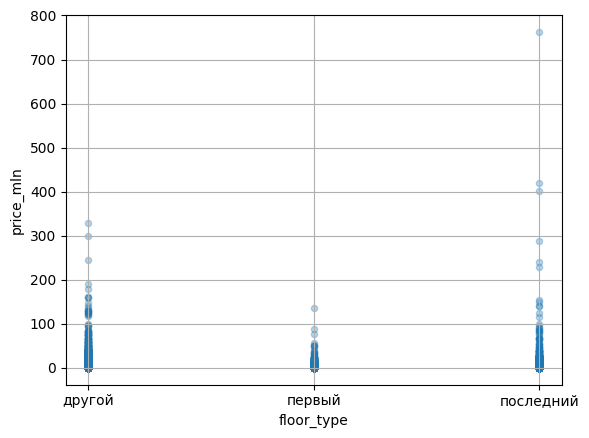

In [87]:
df.plot(x='floor_type', y='price_mln', kind='scatter', alpha=0.3, grid=True)

И по гистограмме, и по сводной таблице видно, что дешевле всего стоят квартиры на первом этаже. Квартиры на последнем этаже не отличаются по цене от квартир промежуточных этажей (здесь мы ориентируемся на медианное значение, т.к. среднее для последнего этажа искажено выбросом).

Наконец, проверим, как цена коррелируется с днем, месяцем и годом подачи объявления.

In [88]:
price_to_day = pd.pivot_table(df, index='day_listed', values='price_mln', aggfunc=['median','mean'])
display(price_to_day)

,median,mean
,price_mln,price_mln
day_listed,,
0,4.650,6.497972
1,4.730,6.402694
2,4.700,6.618259
3,4.650,6.698978
4,4.580,6.375797
5,4.555,7.001599
6,4.550,6.270711


<AxesSubplot: xlabel='day_listed', ylabel='price_mln'>

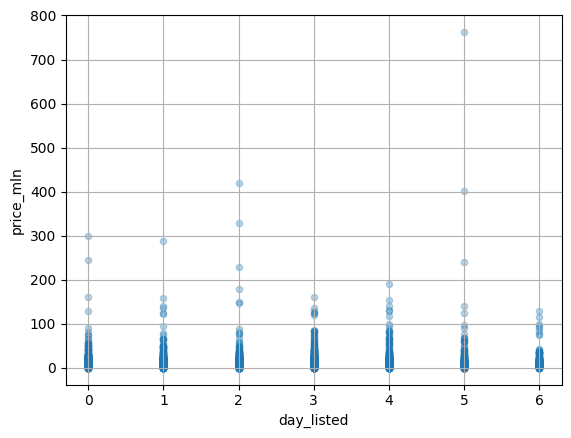

In [89]:
df.plot(x='day_listed', y='price_mln', kind='scatter', alpha=0.3, grid=True)

Корреляция между днем публикации и стоимостью квартиры отсутствует.

In [90]:
price_to_month = pd.pivot_table(df, index='month_listed', values='price_mln', aggfunc=['median','mean'])
display(price_to_month)

,median,mean
,price_mln,price_mln
month_listed,,
1,4.6000,6.678959
2,4.6500,6.477157
3,4.6500,6.377326
4,4.8000,6.758575
5,4.5400,6.624453
6,4.4000,6.299655
7,4.6250,6.565374
8,4.5900,6.361599


Корреляция между месяцем публикации и стоимостью квартиры отсутствует.

In [91]:
price_to_year = pd.pivot_table(df, index='year_listed', values='price_mln', aggfunc=['median','mean'])
display(price_to_year)

,median,mean
,price_mln,price_mln
year_listed,,
2014,8.1185,12.272520
2015,5.3000,8.600647
2016,4.5500,6.828452
2017,4.5000,6.568989
2018,4.5830,5.963212
2019,5.0500,6.795535


<AxesSubplot: xlabel='year_listed', ylabel='price_mln'>

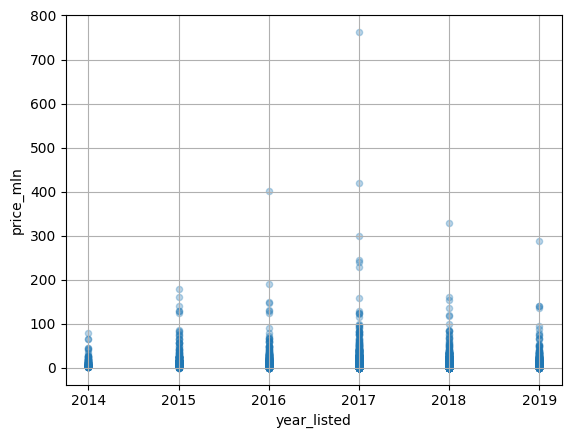

In [92]:
df.plot(x='year_listed', y='price_mln', kind='scatter', alpha=0.3, grid=True)

Между годом публикации объявления и ценой квартиры наблюдается небольшая отрицательная корреляция: начиная с 2015 года квартиры последовательно дешевели до 2018 года, когда цены снова немного выросли.

Итог: Наибольшая корреляция наблюдается между ценой квартиры и ее площадью, больше всего - общей, затем жилой и затем площадью кухни (эти показатели также взаимосвязаны - чем больше квартира, тем больше ее жилая площадь и кухня). На втором месте по силе корреляции - количество комнат, которое также чаще прямо коррелируется с общей площадью квартиры. Этаж влияет на цену квартиры только в том случае, если он - первый. Тогда зависимость обратная, на первом этаже квартиры дешевле. День и месяц публикации объявления не влияют на цену квартиры, а год влияет отрицательно - с 2015 по 2018 годы квартиры дешевели.

#### Вычисление стоимости кв.м. в 10 населенных пунктах с наибольшим числом объявлений

In [93]:
df['locality_name'].value_counts().head(10) #нашли нужные населенные пункты

Санкт-Петербург    15526
Мурино               575
Кудрово              467
Шушары               438
Всеволожск           392
Пушкин               366
Колпино              336
Парголово            325
Гатчина              303
Выборг               234
Name: locality_name, dtype: int64

In [94]:
popular_localities = ['Санкт-Петербург', 'посёлок Шушары', 'Пушкин', 'Колпино', 'посёлок Парголово', 'Петергоф', 'Сестрорецк', 'Красное Село', 'Ломоносов', 'Кронштадт']

needed_localities = df.query('locality_name in @popular_localities') 
#создаем таблицу только с объявлениями из нужных городов

locality_price = pd.pivot_table(needed_localities, index='locality_name', values='sqm_price', aggfunc='mean')

display(locality_price.sort_values(by='sqm_price', ascending=False))

,sqm_price
locality_name,
Санкт-Петербург,114727.409096
Пушкин,103147.825496
Сестрорецк,101694.014038
Петергоф,84761.725739
Кронштадт,79919.235387
Колпино,75500.165477
Ломоносов,72724.046741
Красное Село,72096.004142


Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений представлена в таблице выше. Самая высокая стоимость кв.м. - в Санкт-Петербурге, самая низкая - в Красном Селе.

#### Вычисление стоимости кв.м. в зависимости от расстояния до центра СПб

In [95]:
spb_apartments = df.query('locality_name == "Санкт-Петербург"') 
#создаем таблицу только с объявлениями из СПб

In [96]:
spb_km_price = pd.pivot_table(spb_apartments, index='cityCenters_nearest_km', values='sqm_price', aggfunc='mean')
#создаем таблицу со средней стоимостью кв.м. для каждого км по удалению от центра

display(spb_km_price)

,sqm_price
cityCenters_nearest_km,
0.0,237259.819916
1.0,176637.341782
2.0,157846.827267
3.0,121157.438718
4.0,133356.821075
5.0,140447.195224
6.0,149431.313620
7.0,156430.555565
8.0,124919.252780


<AxesSubplot: xlabel='cityCenters_nearest_km', ylabel='sqm_price'>

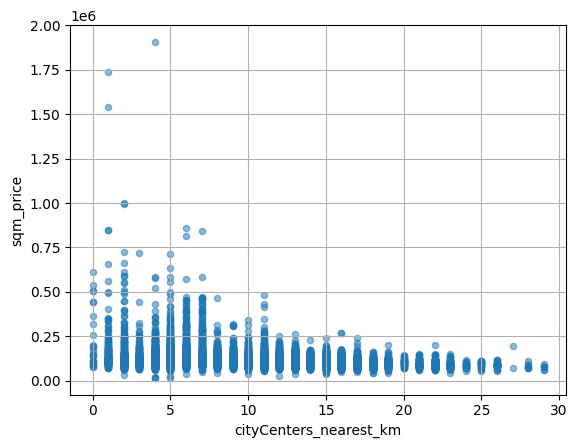

In [97]:
spb_apartments.plot(x='cityCenters_nearest_km', y='sqm_price', kind='scatter', alpha=0.5, grid=True)

In [98]:
print(spb_apartments['cityCenters_nearest_km'].corr(spb_apartments['sqm_price']))

-0.31300959084139635


Средняя стоимость 1 кв.м. жилья в СПб в зависимости от удаленности от центра представлена в таблице выше. В целом, между удаленностью от центра и стоимостью жилья прослеживается отрицательная корреляция - чем дальше от центра, тем дешевле. Есть исключения - более высокая стоимость кв.м. на 20-м и 27-м км., но, скорее всего, она объясняется выбросами, отдельными дорогими квартирами в этих районах, т.к. по условию задачи мы брали среднее, а не медианное значение.

### Общий вывод

Для анализа мы получили архив из 23699 объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за 2015-2019 годы от сервиса Яндекс.Недвижимость. 

В данных были пропуски, часть из которых мы смогли заполнить, но пропущенные расстояния до центра города и до ближайшего аэропорта восстановить не удалось. Также были обнаружены аномалии. В отдельных случаях мы обнаружили их природу и некоторые закономерности и восстановили данные; там, где нам это не удалось, мы удалили строки, чтобы аномальные данные не исказили общую картину. Кроме того, для более детального анализа нам понадобилось добавить в таблицу информацию: год, месяц и день недели публикации объявления, тип этажа квартиры и цену за кв.м.

Закончив предварительную обработку таблицы, мы приступили к анализу.
Сначала мы проанализировали отдельные параметры объектов и составили общее представление о продававшихся квартирах. 

Больше всего квартир в списке - площадью около 50 кв.м. Чаще же всего жилая площадь составляет 20-30 кв.м., а площадь кухни - около 7 кв.м. Больше всего квартир в продаже - одно- и двухкомнатные. Самая распространенная высота потолка - 2,65 м. Чаще всего встречаются квартиры на этажах с 1 по 5 (почти поровну на каждом). Большинство квартир расположено не на первом и не на последнем этаже. Самая распростаненная этажность: 5, 9, 12, 16 и 25 этажей. Больше всего квартир в продаже расположены в 13-15 км от центра города. Примерно у двух третей квартир есть парк в радиусе 1 км.
В будние дни публикуется примерно в 2 раза больше объявлений, чем в выходные. Меньше всего объявлений публикуется в январе, мае и декабре, больше всего - в феврале и ноябре. В летние месяцы объявлений меньше, чем весной и осенью.
В среднем квартира продается за 171 день. Самая быстрая продажа состоялась через день после публикации объявления, самая долгая - через 1572 дня. В целом, если квартира продалась за первые 50 дней, то это хороший показатель.

Далее мы изучили влияние отдельных параметров квартиры на ее стоимость. Наибольшая корреляция наблюдается между ценой квартиры и ее площадью, больше всего - общей, затем жилой и затем площадью кухни (эти показатели также взаимосвязаны - чем больше квартира, тем больше ее жилая площадь и кухня). На втором месте по силе корреляции - количество комнат, которое также чаще прямо коррелируется с общей площадью квартиры. Этаж влияет на цену квартиры только в том случае, если он - первый. Тогда зависимость обратная, на первом этаже квартиры дешевле. День и месяц публикации объявления не влияют на цену квартиры, а год влияет отрицательно - с 2015 по 2018 годы квартиры дешевели.

Мы проанализировали объявления из СПб и разных населенных пунктов Ленинградской области и выяснили, что стоимость кв.м. жилья сильно зависит от города. Предсказуемо, самая высокая цена - в Санкт-Петербурге - в среднем 114 727 руб за кв.м. На втором месте - Пушкин, 103 147 руб за кв.м. Замыкает десятку населенных пунктов с самым дорогим жильем Красное Село с 72 096 руб за кв.м. 

Более детальный анализ стоимости жилья в СПб в зависимости от удаленности от центра показал большой разброс. В самом центре Петербурга кв.м. стоит в среднем 237 259 руб, на расстоянии 10 км от центра - уже 112 668 руб. На расстоянии 29 км (самое большое расстояние от центра среди объявлений) км.м. жилья стоит в среднем 72 953 руб.

В целом, основываясь на результатах нашего анализа, мы рекомендуем учитывать следующие параметры при расчете рыночной стоимости недвижимости: общая площадь и населенный пункт (для СПб - удаленность от центра). Остальные параметры либо напрямую коррелируют с этими, либо имеют слабое или никакое влияние на формирование стоимости жилья.